# Part 2 Exercises

Ethan Davenport, Samuel Chen



In [43]:
import pandas as pd

# Probability Practice

### Part A

In [2]:
# 30% * 50% + 70% * x = 65%
x = (0.65 - 0.3*0.5)/0.7 * 100
print(f'{round(x,1)}% of people who are truthful clickers answered yes')

71.4% of people who are truthful clickers answered yes


### Part B

In [3]:
true_positive = 0.000025 * 0.993
false_positive = 0.999975 * 0.0001
precision = true_positive / (true_positive + false_positive) * 100
print(f'The probability that someone has the disease given they test positive is {round(precision,1)}%')

The probability that someone has the disease given they test positive is 19.9%


# Wrangling the Billboard Top 100

### Part A

In [4]:
df = pd.read_csv('billboard.csv')

In [5]:
df[['performer','song']].value_counts()[:10].reset_index()

,performer,song,0
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,The Weeknd,Blinding Lights,76
3,Jason Mraz,I'm Yours,76
4,LeAnn Rimes,How Do I Live,69
5,OneRepublic,Counting Stars,68
6,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
7,Jewel,Foolish Games/You Were Meant For Me,65
8,Adele,Rolling In The Deep,65
9,Carrie Underwood,Before He Cheats,64


This table depicts the top 10 songs that spent the most weeks on the Billboard Top 100 between 1958 and 2021. The top song is Radioactive by Imagine Dragons, which spent 87 weeks on the Billboard Top 100.

### Part B

<AxesSubplot:xlabel='year'>

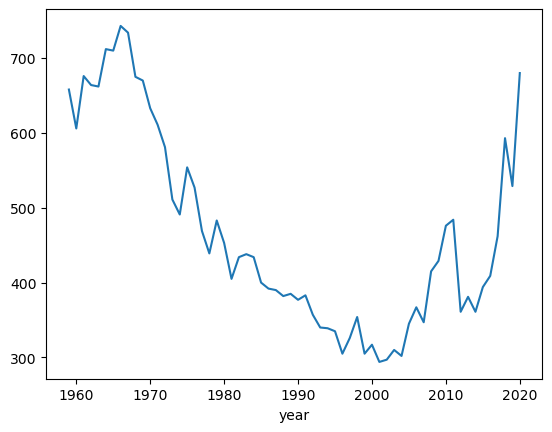

In [6]:
filtered = df[~df['year'].isin([1958,2021])].drop_duplicates(['song','performer'])
filtered.groupby('year')['week_position'].count().plot()

This chart displays the "musical diversity" of the Billboard Top 100 over time, based on the number of unique songs that appear in the top 100 in each year. This shows that diversity was highest when the top 100 was first established; in the 1960s and early 1970s, there were around 600-750 unique songs that appeared each year. However, this number slowly decreased over time, indicating less diversity. This bottomed out around 2000, with only about 300 unique songs appearing in the top 100. Recently, we have seen an explosion of musical diversity with numbers returning to 1960s levels.

### Part C

<AxesSubplot:>

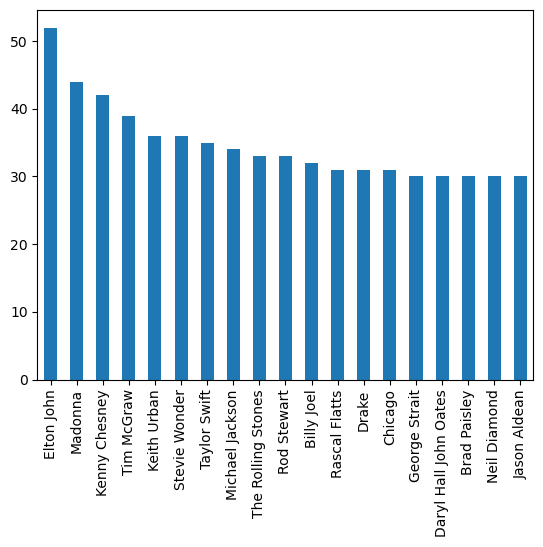

In [7]:
vc = df[['performer','song']].value_counts().reset_index()
vc.rename(columns={0: 'count'}, inplace=True)
top_songs = vc[vc['count'] >= 10]
top_songs['performer'].value_counts()[:19].plot(kind='bar')

This bar plot shows every artist (there are 19 of them) with at least 30 songs that have appeared in the Billboard Top 100 in at least 10 weeks. Elton John has the most such songs with more than 50, followed by Madonna and Kenny Chesney. Five artists barely made the cut for this plot; they have exactly 30 such songs.

# Visual story telling part 1: green buildings

In [44]:
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('greenbuildings.csv')
df.iloc[:5]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [10]:
df['class'] = df.apply(lambda row: 'A' if row['class_a'] == 1  else 'B' if row['class_b'] == 1 else 'C', axis=1)

Text(0.5, 1.0, 'Green Buildings')

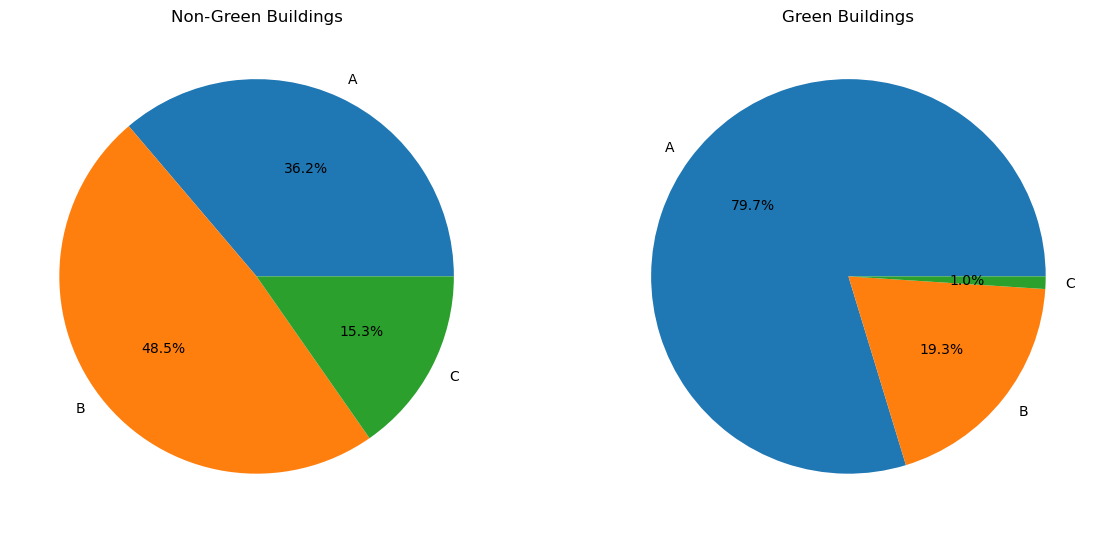

In [11]:
nongreen = df[df['green_rating'] == 0].groupby('class').size()
green = df[df['green_rating'] == 1].groupby('class').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].pie(nongreen, labels=nongreen.index, autopct='%1.1f%%')
axes[0].set_title('Non-Green Buildings')
axes[1].pie(green, labels=green.index, autopct='%1.1f%%')
axes[1].set_title('Green Buildings')

In [12]:
df.groupby('class')['Rent'].median()

class
A    28.20
B    24.00
C    22.06
Name: Rent, dtype: float64

Text(0, 0.5, 'Median Rent')

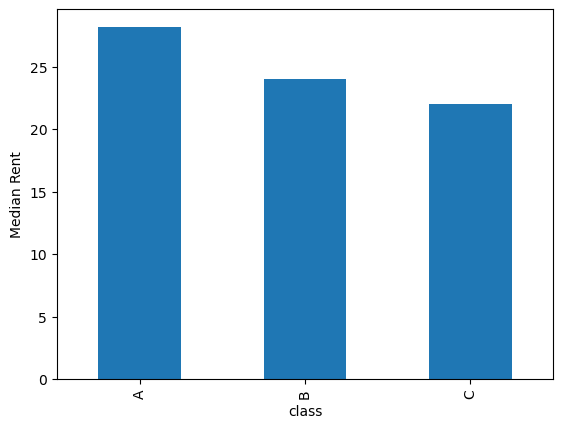

In [13]:
df.groupby('class')['Rent'].median().plot(kind='bar')
plt.ylabel('Median Rent')

The story here is pretty simple, and it explains why median rent is higher in green buildings for reasons other than the simple fact of being a green building. The Excel analyst failed to account for confounding variables that impact the relationship between rent and green status.

Green buildings are much more likely to fall into class A, meaning they are generally high quality, highly desirable buildings unrelated to the fact that they are green. Nearly 80% of green buildings are class A, whereas only 36% of non-green buildings are class A. Furthermore, non-green buildings are much more likely to be class C, the least desirable group, with 15% falling into this category compared to only 1% of green buildings. As shown in the second plot, median rent is notably higher among class A buildings by over \\$4/sqft relative to class B and \\$6/sqft relative to class C. Clearly, we need to do some further investigating to see if going green is as beneficial as it appears to be, or if most of this difference can be explained by class.

# Visual story telling part 2: Capital Metro data

In [14]:
import seaborn as sns

In [15]:
df = pd.read_csv('capmetro_UT.csv')
df.iloc[:5]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


Text(956.631313131313, 0.5, 'Hour of Day')

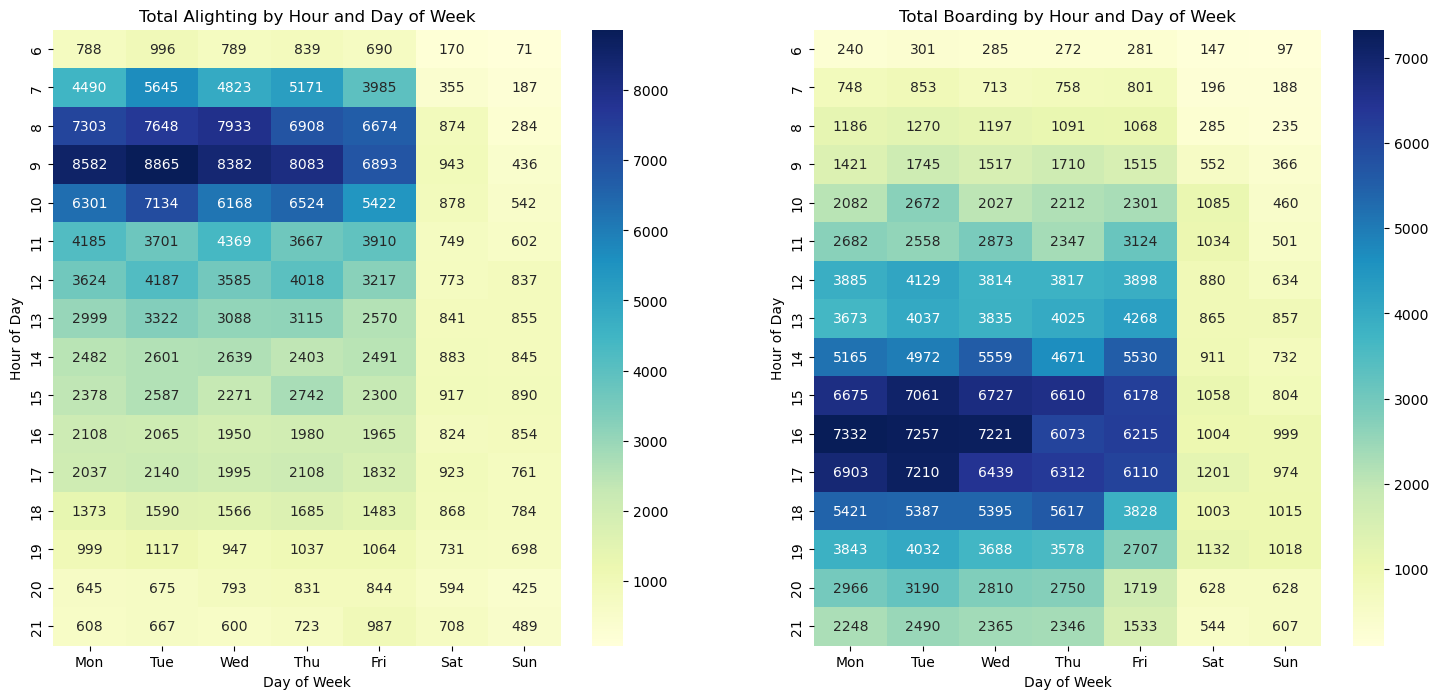

In [16]:
agg_data = df.groupby(['day_of_week', 'hour_of_day']).agg({'boarding': 'sum', 'alighting': 'sum'}).reset_index()

days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
agg_data['day_of_week'] = pd.Categorical(agg_data['day_of_week'], categories=days_order, ordered=True)

boarding_pivot = agg_data.pivot('hour_of_day', 'day_of_week', 'boarding')
alighting_pivot = agg_data.pivot('hour_of_day', 'day_of_week', 'alighting')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.heatmap(alighting_pivot, cmap="YlGnBu", annot=True, fmt="d", ax=axes[0])
axes[0].set_title('Total Alighting by Hour and Day of Week')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Hour of Day')

sns.heatmap(boarding_pivot, cmap="YlGnBu", annot=True, fmt="d", ax=axes[1])
axes[1].set_title('Total Boarding by Hour and Day of Week')
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Hour of Day')

This plot shows the distribution of alighting and boarding, respectively, across time of day and day of week. Here, we can see a very strong trend of peak alighting times occurring in the morning and peak boarding times occurring in the afternoon. This is no surprise, as students get off the bus on UT campus to get to class, then board the bus at the end of the day to return home. One interesting observation is that peak alighting times occur over a much smaller window than peak boarding times; people arrive to UT campus at very similar times but leave campus at a much wider distribution of times.

Additionally, there is a very steep dropoff of ridership around UT campus on weekends. People seem to use Cap Metro for classes or work functions much more commonly than other reasons.

In [17]:
bins = list(range(0, int(max(df['temperature'])) + 5, 5))
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins) - 1)]
df['tcat'] = pd.cut(df['temperature'], bins=bins, labels=labels, include_lowest=True)

Text(0.5, 1.0, 'Average Boarding by Temperature')

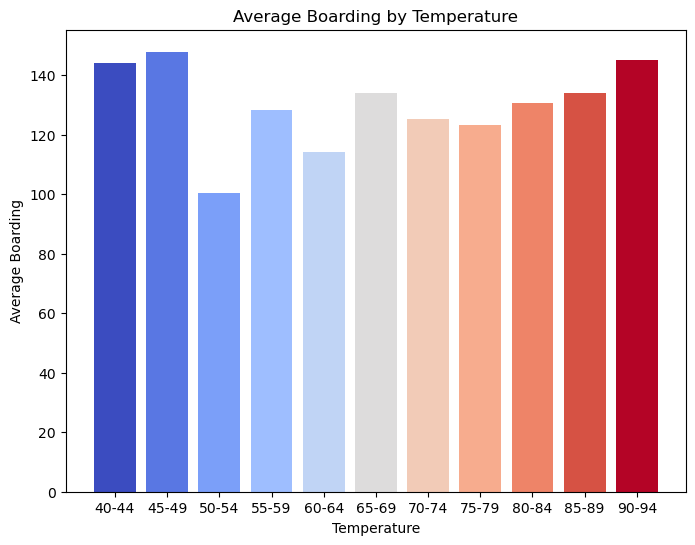

In [23]:
peak_boarding = df[(df['weekend'] == 'weekday') & (df['hour_of_day'] >= 15) & (df['hour_of_day'] <= 17)]
groups = peak_boarding.groupby(['tcat'])['boarding'].mean().reset_index().dropna()

cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(groups.index.min(), groups.index.max())

plt.figure(figsize=(8, 6))
colors = [cmap(norm(i)) for i in groups.index]

plt.bar(groups['tcat'], groups['boarding'], color=colors)
plt.xlabel('Temperature')
plt.ylabel('Average Boarding')
plt.title('Average Boarding by Temperature')

This figure aims to show how temperature impacts ridership. However, temperature fluctuates widely within each day. To control for this, I filtered to only include the hottest part of the day (3pm - 5pm), which also aligns with peak boarding times. I also wanted to make sure any fluctuations were not caused by the difference in weekends vs weekdays, so I only included weekdays.

Having controlled for those confounding factors, it appears that temperature has little impact on ridership. People use Capital Metro out of necessity, not just convenience. They are not scared away from using the bus when Austin experiences extreme temperatures, either hot or cold.

# Clustering and dimensionality reduction

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px  # for interative visualizations

In [2]:
# read the data
wine = pd.read_csv('wine.csv')

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
wine_scale = scaler.fit_transform(wine.drop(columns=['quality','color']))

In [211]:
wine.drop(columns=['quality','color'])

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


/Users/samchen/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


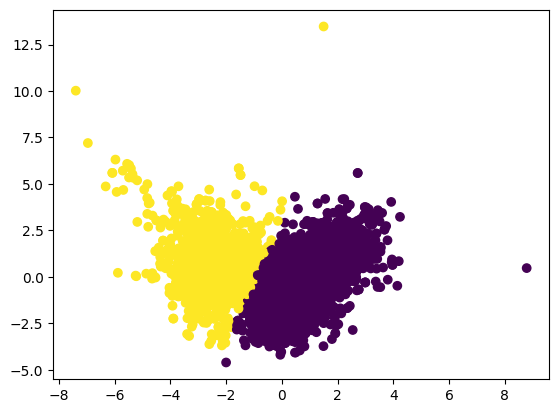

In [3]:
from sklearn.cluster import KMeans

#PCA Analysis
target = wine[['quality','color']]

wine_drop = wine.drop(columns = ['quality','color'])

#standardize all the values
scaler = StandardScaler()
wine_scaled_pca = scaler.fit_transform(wine_drop)

pca = PCA(n_components=2)
principle_components = pca.fit_transform(wine_scaled_pca)

#using k means to get clustering
kmeans = KMeans(n_clusters = 2, random_state = 17)
kmeans.fit(principle_components)
#asign color labels from the
pca_cluster_labels = kmeans.labels_

#define new data frame with transformed principle components
pca_df = pd.DataFrame(data = principle_components, columns = ['pca 1','pca 2'])
#add a column that gives the color
pca_df['Cluster'] = pca_cluster_labels

plt.scatter(pca_df['pca 1'], pca_df['pca 2'], c=pca_df['Cluster'])
plt.show()

In [212]:
# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_results = tsne.fit_transform(wine_scale)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6497 samples in 0.051s...
[t-SNE] Computed neighbors for 6497 samples in 2.693s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6497
[t-SNE] Computed conditional probabilities for sample 2000 / 6497
[t-SNE] Computed conditional probabilities for sample 3000 / 6497
[t-SNE] Computed conditional probabilities for sample 4000 / 6497
[t-SNE] Computed conditional probabilities for sample 5000 / 6497
[t-SNE] Computed conditional probabilities for sample 6000 / 6497
[t-SNE] Computed conditional probabilities for sample 6497 / 6497
[t-SNE] Mean sigma: 0.697145
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.130295
[t-SNE] KL divergence after 1000 iterations: 1.409015


In [213]:
# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the color and quality to this DataFrame
tsne_df['Color'] = wine['color'].values
tsne_df['Quality'] = wine['quality'].values

# create an interactive plot
px.scatter(tsne_df, x='Dim1', y='Dim2', color='Color')

C:\Users\ethan\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [214]:
px.scatter(tsne_df, x='Dim1', y='Dim2', color='Quality')

In [215]:
from sklearn.cluster import SpectralClustering, KMeans

In [216]:
wine = pd.read_csv('wine.csv')
X = wine.drop(columns=['color','quality'])
X.shape

(6497, 11)

In [217]:
# Compare with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Apply SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
spectral_labels = spectral_clustering.fit_predict(X)

In [218]:
# add the color and quality to this DataFrame
tsne_df['kmeans_labels'] = kmeans_labels
tsne_df['spectral_labels'] = spectral_labels

# create an interactive plot
px.scatter(tsne_df, x='Dim1', y='Dim2', color='spectral_labels', color_continuous_scale=px.colors.sequential.Cividis)

Using just PCA dosen't show any meaningful distinction between the two colors of wine. Yes, after running k-means clustering, that there is some distinction between the two groups, but tSNE significant out performs PCA.

As seen from the visualizations of the tSNE breakdown, there are two distinct groups that are separated on the screen. After exploring different clustering algorithms, spectral clustering gave us the best results.

As seen from the second tSNE visualization, the algorithm is does not do a great job in distinguishing quality, despite being effective in distinguishing color. There are some pockets of the tSNE graph that tend to group higher or lower quality wines together, but tSNE alone is not very helpful for determining a wine's quality.

# Market segmentation: tSNE and Spectral Clustering

In [76]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import plotly.express as px  # for interative visualizations

In [77]:
df = pd.read_csv('social_marketing.csv').set_index('Unnamed: 0')
df.iloc[:5]

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
hmjoe4g3k,2,0,2,2,2,1,1,0,4,1,...,1,0,1,1,0,11,0,0,0,0
clk1m5w8s,3,3,2,1,1,1,4,1,2,2,...,0,0,0,1,4,0,0,0,0,0
jcsovtak3,6,3,4,3,1,5,0,2,1,1,...,0,1,0,1,0,0,1,0,0,0
3oeb4hiln,1,5,2,2,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
fd75x1vgk,5,2,0,6,1,0,0,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [78]:
# Select features for clustering
features = df.drop(columns=['chatter'])

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [79]:
# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_df = pd.DataFrame(tsne.fit_transform(scaled_features))

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7882 samples in 0.008s...
[t-SNE] Computed neighbors for 7882 samples in 1.362s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7882
[t-SNE] Computed conditional probabilities for sample 2000 / 7882
[t-SNE] Computed conditional probabilities for sample 3000 / 7882
[t-SNE] Computed conditional probabilities for sample 4000 / 7882
[t-SNE] Computed conditional probabilities for sample 5000 / 7882
[t-SNE] Computed conditional probabilities for sample 6000 / 7882
[t-SNE] Computed conditional probabilities for sample 7000 / 7882
[t-SNE] Computed conditional probabilities for sample 7882 / 7882
[t-SNE] Mean sigma: 1.219362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.340256
[t-SNE] KL divergence after 1000 iterations: 2.514111


In [80]:
# Apply SpectralClustering
spectral_clustering = SpectralClustering(n_clusters=8, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
df['cluster'] = spectral_clustering.fit_predict(scaled_features)

tsne_df['cluster'] = df['cluster'].values

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



Text(0, 0.5, 'Dim2')

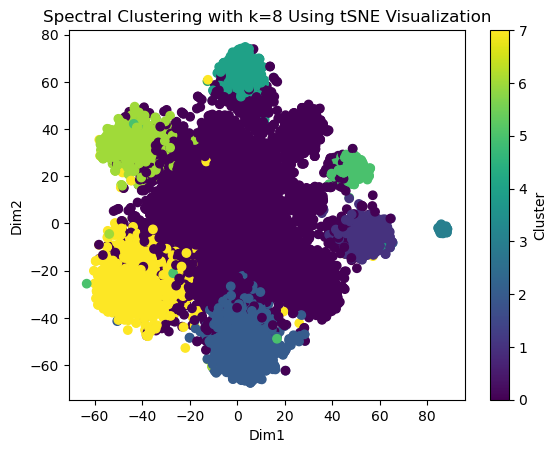

In [86]:
plt.scatter(tsne_df[0], tsne_df[1], c=tsne_df['cluster'], cmap='viridis')
    
colorbar = plt.colorbar()
colorbar.set_label('Cluster')

plt.title(f'Spectral Clustering with k=8 Using tSNE Visualization')
plt.xlabel('Dim1')
plt.ylabel('Dim2')

In [90]:
# Analyze clusters based on their highest category score
cluster_means = df.groupby('cluster').mean()
cluster_categories = cluster_means.drop(columns=['chatter']).T.idxmax()
cluster_means['high category'] = cluster_categories

In [91]:
cluster_sizes = tsne_df['cluster'].value_counts()
cluster_means['size'] = cluster_sizes
cluster_means

,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,family,...,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult,high category,size
cluster,,,,,,,,,,,,,,,,,,,,,
0,4.706398,1.518297,1.210999,2.586561,0.796276,1.241601,1.150225,1.482559,0.828162,0.637064,...,0.502889,0.749198,0.553606,0.734004,0.615878,0.329339,0.000000,0.139097,photo_sharing,4673
1,3.963687,1.617318,8.762570,2.231844,0.664804,0.891061,1.120112,11.041899,1.659218,0.743017,...,0.888268,1.139665,0.597765,1.005587,0.620112,0.550279,0.000000,0.094972,politics,358
2,3.887255,1.578431,1.241422,2.313725,0.677696,0.835784,5.567402,1.067402,4.365196,2.373775,...,3.787990,0.481618,2.484069,1.035539,0.900735,0.329657,0.000000,0.186275,sports_fandom,816
3,4.653061,1.877551,2.244898,2.448980,0.918367,0.877551,1.897959,2.244898,1.469388,0.795918,...,1.204082,0.693878,0.877551,1.755102,0.959184,0.530612,1.040816,7.204082,adult,49
4,3.862170,1.360704,1.410557,2.595308,0.721408,1.196481,1.225806,1.217009,1.181818,1.067449,...,0.668622,0.563050,0.445748,1.008798,0.797654,0.372434,0.000000,0.137830,college_uni,341
5,4.041667,1.458333,1.578125,2.057292,1.062500,0.614583,1.250000,1.072917,1.187500,0.906250,...,1.041667,0.505208,0.760417,1.333333,0.776042,0.531250,0.000000,9.093750,adult,192
6,4.051233,1.686907,1.322581,5.571157,1.157495,0.743833,0.981025,1.153700,0.867173,0.808349,...,0.698292,0.555977,0.846300,1.127135,5.533207,0.388994,0.000000,0.134725,cooking,527
7,3.921166,1.450324,1.180346,2.317495,0.854212,0.725702,1.055076,1.087473,1.975162,0.676026,...,0.699784,0.739741,0.470842,6.057235,0.686825,0.200864,0.000000,0.136069,health_nutrition,926


We used spectral clustering to define NutrientH2O's market segments. We selected 8 clusters after iterating through many potential values of k, deciding that 8 clusters was best able to balance having homogeneity within groups and heterogeneity between groups. Unfortunately, this method grouped the majority of NutrientH2O's followers into what amounts as a sea of ambiguity. There are no categories that come out particularly strong for this group, though 'photo_sharing' technically leads the pack. This cluster likely consists of users who are not very active on Twitter, or maybe ones that simply don't fit into one of the other categories (this group has the highest 'chatter' rating among all the groups). 

It is when we look at the other 7 categories that our insights become more interesting. The two smallest clusters contain types of spam and/or adult content, who simply slipped through the filter to make it into this data set. The most prominent category of the two largest clusters of followers are 'health_nutrition' and 'sports_fandom'. This suggests NutrientH2O's consumer base generally has an interest in sports and health, so the company should hone its social media presence to appeal to these consumer interests. The company additionally has smaller market segments that are interested in cooking, politics, and college, although these segments may or may not be large enough to spend marketing resources towards.

# The Reuters corpus

In [94]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("STA380-master/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("STA380-master/data/ReutersC50/C50test")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [95]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ethan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [132]:
train_labels

['AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AaronPressman',
 'AlanCrosby',
 'AlanCrosby',
 'AlanCrosby',
 'AlanCrosby',
 'AlanCrosby',
 'AlanCrosby',
 'AlanCros

In [105]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts]
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts]

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")

Total number of training documents: 2500
Total number of test documents: 2500

Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2568 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


In [96]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'w

In [128]:
feature_names = vectorizer.get_feature_names_out()
pd.DataFrame(train_dtm.toarray(), columns=feature_names)

,'','d,'ll,'m,'re,'s,'ve,+44,--,..,...,yokich,york,young,yuan,zealand,zeman,zemin,zhang,zhou,zinc
0,2,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,7,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,8,0,0,0,0,10,0,0,3,0,...,0,0,0,0,0,0,1,0,0,0
2497,1,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,6,0,0,0,0,4,0,0,3,0,...,0,0,0,1,0,0,0,0,0,0


In [114]:
# a TSNE visualization of the articles
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Reduce dimensionality to 100 using TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_features = svd.fit_transform(train_dtm)

In [116]:
# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_df = pd.DataFrame(tsne.fit_transform(reduced_features))

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2500 samples in 0.002s...
[t-SNE] Computed neighbors for 2500 samples in 0.154s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 6.279740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.853302
[t-SNE] KL divergence after 1000 iterations: 1.230084


In [118]:
# Apply SpectralClustering
n_clusters = 50
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
tsne_df['cluster'] = spectral_clustering.fit_predict(train_dtm)

C:\Users\ethan\anaconda3\lib\site-packages\sklearn\cluster\_spectral.py:702: UserWarning:

The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.



In [177]:
px.scatter(tsne_df, x=0, y=1, color='cluster', hover_data=['author'], width=800, height=800)

In [206]:
tsne_df['niche'] = articles['cluster'].isin(tsne_df['cluster'].value_counts()[-25:].index.values)
px.scatter(tsne_df, x=0, y=1, color='niche', hover_data=['author'], width=800, height=800)

C:\Users\ethan\anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [175]:
articles = pd.merge(tsne_df, pd.DataFrame(train_dtm.toarray(), columns=feature_names), left_index=True, right_index=True)
articles = pd.merge(articles, pd.DataFrame(train_texts), left_index=True, right_index=True)
articles[(abs(articles['0_x']) < 10) & (abs(articles[1]) < 10) & (articles['author_x'] == "RobinSidel")]['0_y'].iloc[0]

'Republic Industries Inc., the aggressive Florida company run by businessman Wayne Huizenga, on Friday defended its plans to buy security firm ADT Ltd. after a New York newspaper reported that the transaction would be called off.\n"The deal has not been killed. It is still moving forward," spokesman Ronald Castell said.\nHuizenga, founder of Blockbuster Entertainment, owns the Florida Marlins baseball, Dolphins football and Panthers hockey professional sports teams. Republic has three major areas of business: electronic security, solid waste and used cars.\nOriginally valued at $5 billion when the stock transaction was announced in July, the deal has lost about 20 percent of its value due to a steep decline in Republic\'s share price. At the time the deal was first announced, Republic shares were trading at about $29.\nCiting unnamed industry sources, the New York Post reported that ADT was expected to call off the deal because of the drop in value.\nShares of Republic closed up 62.5 c

Text(0.5, 1.0, 'Authors with the Highest Number of Niche Articles')

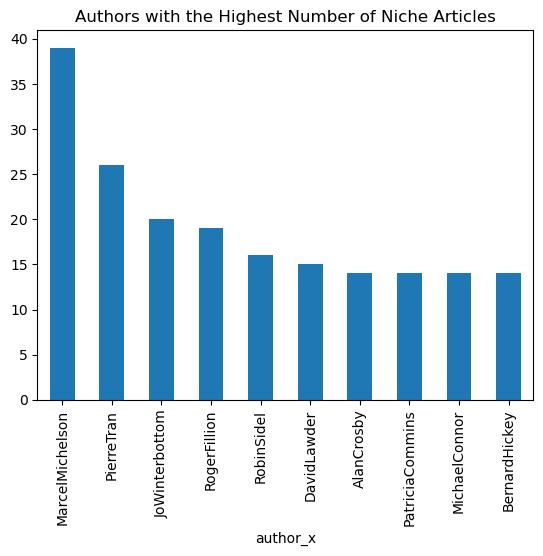

In [202]:
niche_articles = articles[articles['cluster'].isin(tsne_df['cluster'].value_counts()[-25:].index.values)]
niche_articles['author_x'].value_counts()[:10].plot(kind='bar')
plt.title('Authors with the Highest Number of Niche Articles')

In [199]:
reg_vec = articles.iloc[:, 4:-1].mean()
niche_vec = niche_articles.iloc[:, 4:-1].mean()
niche_lift = pd.DataFrame({'reg_freq':reg_vec, 'niche_freq':niche_vec, 'lift':niche_vec/reg_vec})
niche_lift.sort_values(by='lift', ascending=False)[:10]

,reg_freq,niche_freq,lift
scotam,0.0392,0.291667,7.440476
conrail,0.0912,0.678571,7.440476
norfolk,0.0508,0.377976,7.440476
poultri,0.0652,0.482143,7.394829
csx,0.0648,0.479167,7.394547
aerospatial,0.0232,0.169643,7.312192
andrea,0.0264,0.190476,7.215007
libert,0.0496,0.351190,7.080453
quarantin,0.0184,0.127976,6.955228
pearson,0.0480,0.333333,6.944444


In [200]:
niche_lift[niche_lift['niche_freq'] > 1].sort_values(by='lift', ascending=False)[:10]

,reg_freq,niche_freq,lift
franc,0.3644,1.747024,4.794248
bid,0.3736,1.285714,3.441419
offer,0.5112,1.172619,2.293856
amp,0.5108,1.145833,2.243213
sale,0.7656,1.306548,1.706567
u.s.,0.9172,1.562500,1.703554
billion,1.2232,2.005952,1.639922
state,0.7472,1.217262,1.629098
group,0.9204,1.312500,1.426010
industri,0.9028,1.217262,1.348318


QUESTION: In our analysis of the Reuters corpus, we wanted to explore the most niche articles of the data. Which authors wrote these articles? What makes these articles unique? How are they collectively different from the rest of the corpus?

APPROACH: For data processing, we first followed the process detailed in class to tokenize the text file. Then, we included an intermediate step of reducing dimensionality using TruncatedSVD. After this preprocessing was complete, we decided to apply spectral clustering in order to categorize articles into clusters. Any articles that fell into the clusters with the smallest number of articles in that cluster could be considered 'niche'. We decided to set this threshold as the bottom half of all 50 clusters, which had a maximum of 19 articles in each cluster. This gave us a set of 336 articles out of the original 2500 that we consider 'niche'. We then conducted a tSNE analysis to visualize these clusters as well as which articles were categorized as 'niche', then looked deeper into which authors wrote these niche articles and how word use (given by tokenization) differs between niche and non-niche articles.

RESULTS: As shown in the first plot, spectral clustering and tSNE are in reasonable agreement as to the grouping of articles. Interestingly, niche articles appear all across the tSNE graph, including near the center, although they do tend to occur in small clusters as expected. We specifically wanted to see which authors are the most 'different' from the other authors. We created a plot to show which authors have the highest number of niche articles, led by Marcel Michelson with nearly 40 of his 50 articles. The top 10 niche authors shown on the plot comprise over half of all niche articles. Finally, we found the tokens that appear with a much higher relative frequency in niche articles than in non-niche ones. There are several results that appear more than 7x as often in niche articles, but these are mostly company names or highly specific words that appear with low frequency such as 'scotam', 'conrail', and 'csx'. So we ignored any tokens that appear less than once per niche article on average, and found that 'franc' is used 4.8x more frequently in niche articles, followed by 'bid', 'offer', and 'amp'.

CONCLUSION: Discovering what makes a Reuters article 'different' is relatively hard, since the C50 corpus has already been filtered to include business and industry news. Our most niche author, Marcel Michelson focuses on French politics and economics news. Other authors such as Robin Sidel, who is closer to the mean, writes about American financial institutions. Interestingly, Bernard Hickey, who writes about New Zealand climate and housing crises is considered closer to the "mean" than Marcel Michelson. Maybe the differences lie in the coverage of European news and certain terms and writing styles that would be more aligned to news on Europe. This theory is supported by the fact that 'franc' is the token used most commonly in niche articles relative to the baseline.

# Association rule mining

Please refer to R Markdown file for the association rule mining.

# Image classification with neural networks

Please refer to the neural net notebook for the image classification problem.